In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
# 加载iris数据集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 选择前两个特征
y = iris.target

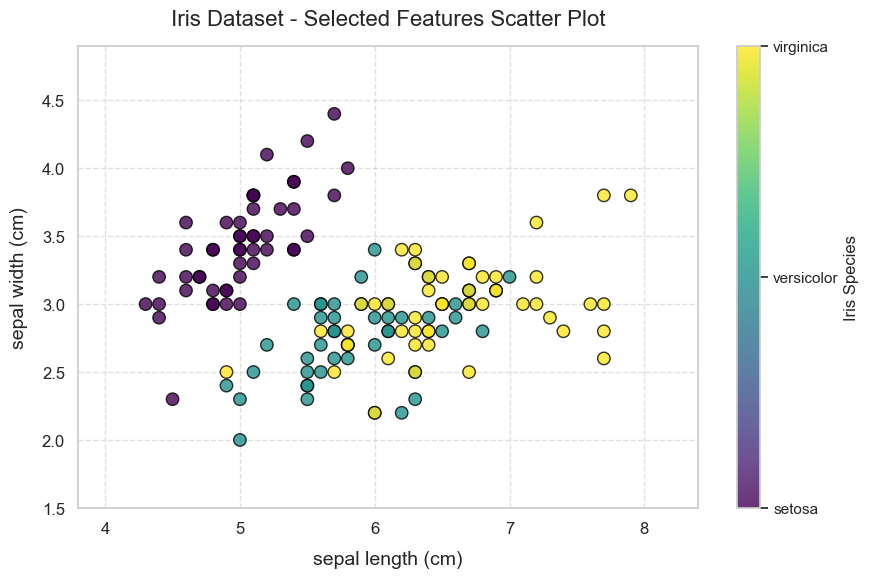

In [3]:
# 数据集可视化
# 设置 Seaborn 风格和调色板
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor='black', s=80, alpha=0.8)

# 添加颜色条
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_label("Iris Species")
cbar.set_ticklabels(iris.target_names)

# 添加坐标轴标签和标题
plt.xlabel(iris.feature_names[0], fontsize=14, labelpad=10)
plt.ylabel(iris.feature_names[1], fontsize=14, labelpad=10)
plt.title("Iris Dataset - Selected Features Scatter Plot", fontsize=16, pad=15)

# 设置坐标轴范围和字体
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [4]:
# 数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 逻辑回归模型训练
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [5]:
# 输出决策函数的参数
print("模型系数 (权重):\n", model.coef_)
print("截距 (bias):\n", model.intercept_)

# 模型预测
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("分类准确率:", accuracy)


模型系数 (权重):
 [[-2.41340771  2.00400786]
 [ 0.53411793 -1.60202721]
 [ 1.87928978 -0.40198065]]
截距 (bias):
 [ 7.1589139   2.30201128 -9.46092518]
分类准确率: 0.8222222222222222


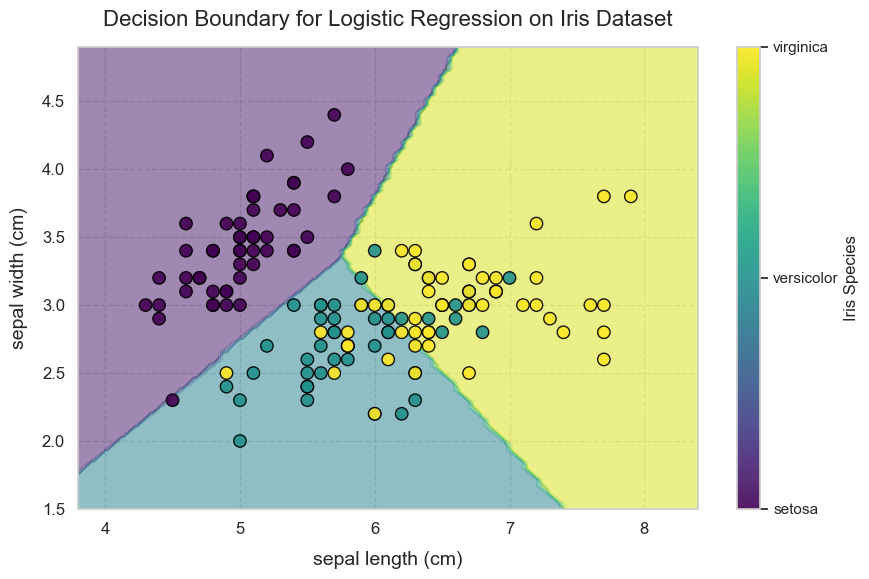

In [6]:
# 决策边界可视化
# 再次设置Seaborn的白色网格风格
sns.set(style="whitegrid")

# 设置网格范围
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 使用模型预测网格数据点的类别
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 创建决策边界图
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.3)  # 使用更柔和的 viridis 颜色映射，并设置透明度

# 使用DecisionBoundaryDisplay绘制边界
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap="viridis", ax=plt.gca(), alpha=0.3
)

# 绘制数据散点图
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="black", s=80, alpha=0.9)

# 添加颜色条
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_label("Iris Species", fontsize=12)
cbar.set_ticklabels(iris.target_names)

# 添加标题和坐标标签
plt.xlabel(iris.feature_names[0], fontsize=14, labelpad=10)
plt.ylabel(iris.feature_names[1], fontsize=14, labelpad=10)
plt.title("Decision Boundary for Logistic Regression on Iris Dataset", fontsize=16, pad=15)

# 设置坐标轴范围
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 添加虚线网格
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [7]:
# 测试函数，包含模型训练、准确率计算、决策边界绘制
def test_and_visualize_model(model, X_train, X_test, y_train, y_test, title):
    # 模型训练
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 计算准确率
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{title} - 训练集准确率: {train_accuracy:.3f}, 测试集准确率: {test_accuracy:.3f}")

    # 决策边界可视化
    plt.figure(figsize=(10, 6))
    DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict", cmap="viridis", ax=plt.gca(), alpha=0.3
    )

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="black", s=80, alpha=0.9)
    cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
    cbar.set_label("Iris Species", fontsize=12)
    cbar.set_ticklabels(iris.target_names)
    plt.xlabel(iris.feature_names[0], fontsize=14, labelpad=10)
    plt.ylabel(iris.feature_names[1], fontsize=14, labelpad=10)
    plt.title(f"Decision Boundary for {title}", fontsize=16, pad=15)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
    return train_accuracy, test_accuracy

Logistic Regression Model Comparison
Logistic Regression (One-vs-Rest) - 训练集准确率: 0.800, 测试集准确率: 0.822


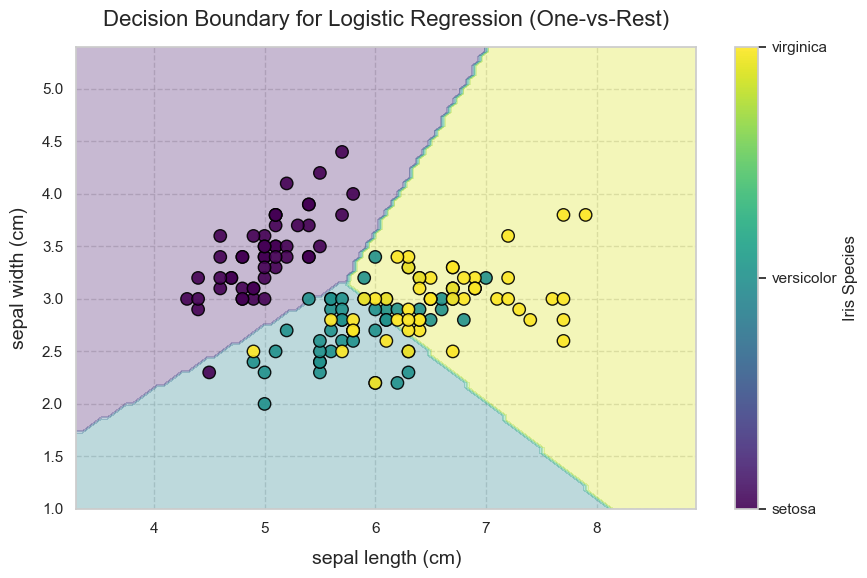

Logistic Regression (Multinomial) - 训练集准确率: 0.790, 测试集准确率: 0.822


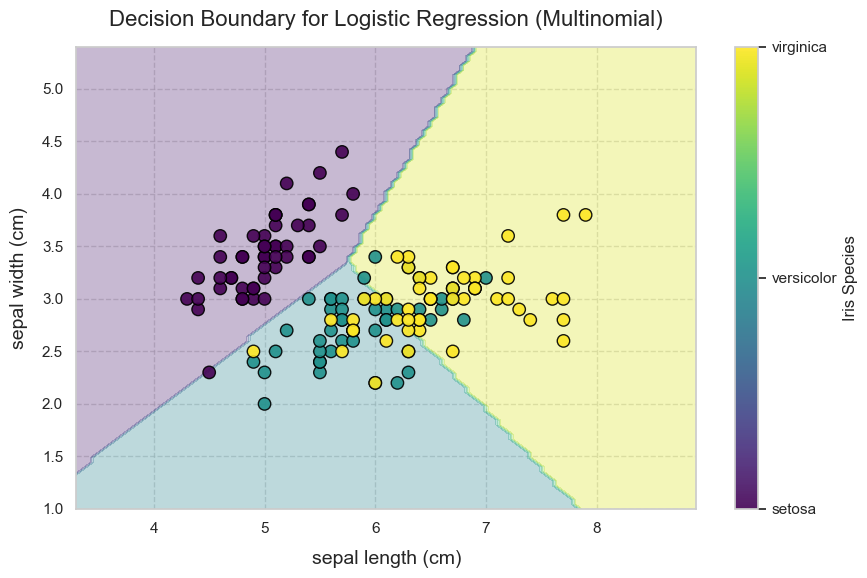

In [8]:
# 比较1：Logistic Regression 'ovr' vs 'multinomial'
print("Logistic Regression Model Comparison")
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
train_acc_ovr, test_acc_ovr = test_and_visualize_model(model_ovr, X_train, X_test, y_train, y_test, "Logistic Regression (One-vs-Rest)")

model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
train_acc_multi, test_acc_multi = test_and_visualize_model(model_multi, X_train, X_test, y_train, y_test, "Logistic Regression (Multinomial)")


Other Multiclass Model Comparison
Decision Tree - 训练集准确率: 0.962, 测试集准确率: 0.667


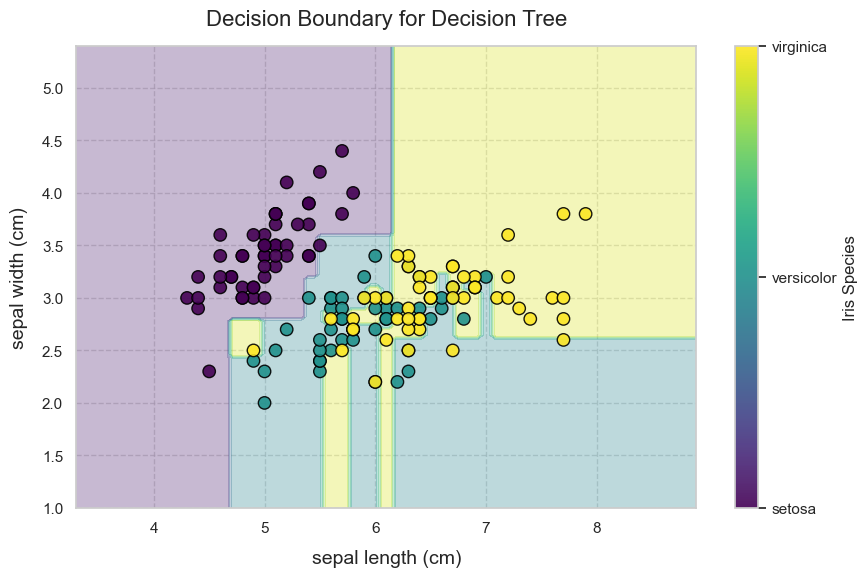

SVM (One-vs-Rest) - 训练集准确率: 0.819, 测试集准确率: 0.800


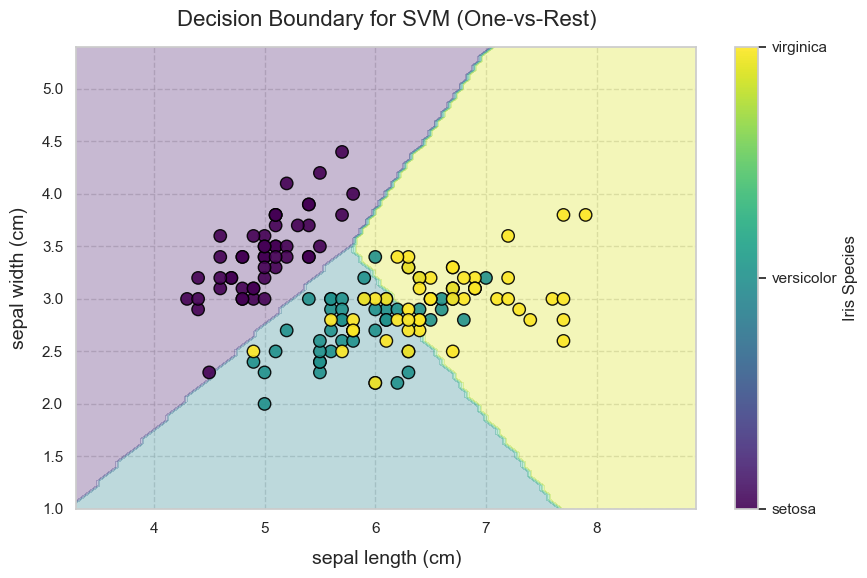

Naive Bayes - 训练集准确率: 0.781, 测试集准确率: 0.822


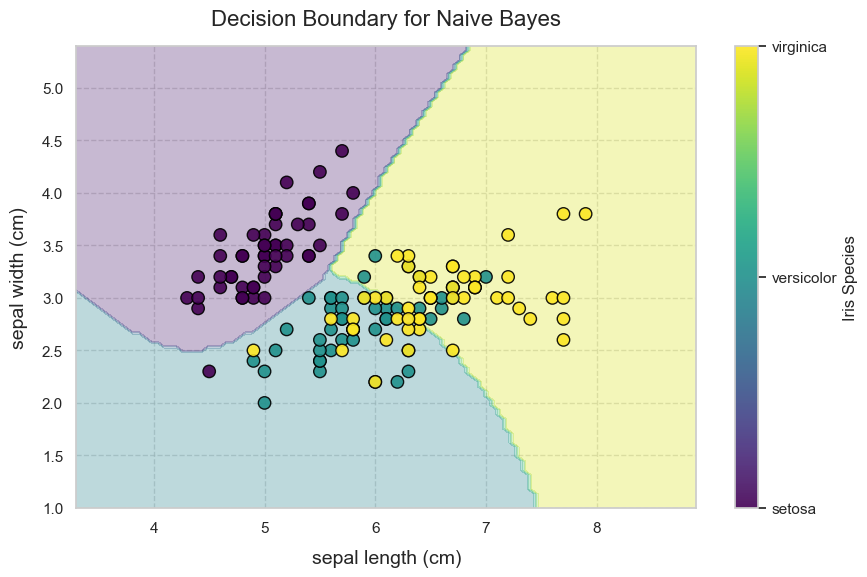

In [9]:
# 比较2：不同多分类模型（决策树、SVM、朴素贝叶斯）
print("Other Multiclass Model Comparison")

# Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)
train_acc_tree, test_acc_tree = test_and_visualize_model(model_tree, X_train, X_test, y_train, y_test, "Decision Tree")

# SVM
model_svm = SVC(kernel="linear", decision_function_shape="ovr")
train_acc_svm, test_acc_svm = test_and_visualize_model(model_svm, X_train, X_test, y_train, y_test, "SVM (One-vs-Rest)")

# Naive Bayes
model_nb = GaussianNB()
train_acc_nb, test_acc_nb = test_and_visualize_model(model_nb, X_train, X_test, y_train, y_test, "Naive Bayes")